
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 5 - RL <br>
<font color=696880 size=4>
Amirmahdi Meighani


____

# Personal Data

In [167]:
# Set your student number and name
student_number = '401170637'
Name = 'Bardia'
Last_Name = 'Mandegar'

# Rules

<font color=red>
Please run all the cells.
</font>

# Q1: Mountain Car (100 Points)

In this notebook we have a game called mountain car. the car is in a valley and at evey moment we can model its state using two floats as speed and location along x axis. You can control the car using three actions.

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

the goal is to reach the peak of mountain in the minimum number of frames. because you get -1 reward for evey timestamp.

you should model the countious enviroment with a approximate descrete one and train your agent using Q learning and SARSA algorithms.


install required libraries

In [168]:
!pip install numpy
!pip install matplotlib
!pip install gymnasium

## imports

In [169]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [170]:
def visualize(env):
    '''
    use this function to see the state of the game in the current moment
    '''
    env_screen = env.render()
    plt.imshow(env_screen)
    plt.axis('off')
    title = 'speed is ' + str(env.unwrapped.state[1])

    plt.title(title)
    plt.show()

## Q Learning

in this question we have a countious enviroment but you can approximate it as a discrete enviormnet then learn and act according to that.

you can see the information of game below.

In [171]:
env = gym.make("MountainCar-v0",render_mode='rgb_array',max_episode_steps=200)
spec = gym.spec('MountainCar-v0')

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0


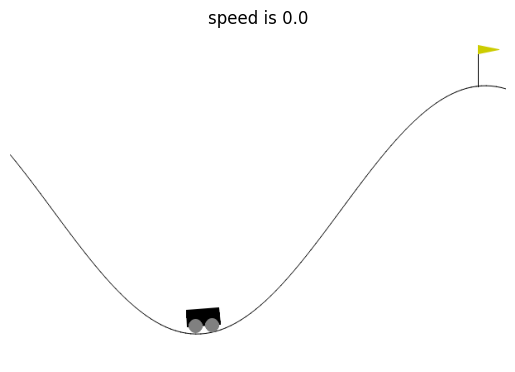

In [172]:
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")
env.reset()
visualize(env)

Observation Space:
The observation is a ndarray with shape (2,) where the elements correspond to the following:

| Num |              Observation             |  Min  |  Max |
|:---:|:------------------------------------:|:-----:|:----:|
|  0  | position of the car along the x-axis |  -1.2 |  0.6 |
|  1  | velocity of the car                  | -0.07 | 0.07 |

Action Space:
There are 3 discrete deterministic actions:

0: Accelerate to the left

1: Don’t accelerate

2: Accelerate to the right

You can play in this env yourself!!!

Try some actions and visulize the env after every 5 action. use env.step(action) function to do actions. print output of some step function. It returns five values :

new_state, reward, is_terminated ,is_truncated ,extra_info

new state after the action, reward for that action in that step, is the game terminated by reaching the goal, is the game finished by reaching 200 episode limit that is the default in this game, and some possible extra info that we don't use.


Start state: [-0.40047261  0.        ]
Step 1:
Action taken: 2
New State: [-4.003752e-01  9.741020e-05]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 2:
Action taken: 1
New State: [-0.40118107 -0.00080586]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 3:
Action taken: 1
New State: [-0.40288454 -0.00170349]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 4:
Action taken: 1
New State: [-0.40547374 -0.00258919]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 5:
Action taken: 1
New State: [-0.40893045 -0.0034567 ]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}


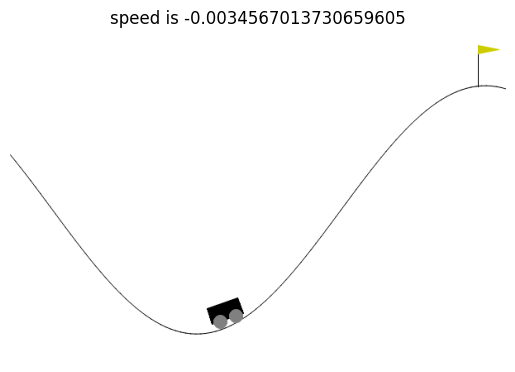

Step 6:
Action taken: 2
New State: [-0.41223028 -0.00329985]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 7:
Action taken: 0
New State: [-0.41734996 -0.00511966]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 8:
Action taken: 1
New State: [-0.42325306 -0.0059031 ]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 9:
Action taken: 2
New State: [-0.42889744 -0.00564438]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 10:
Action taken: 1
New State: [-0.43524256 -0.00634512]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}


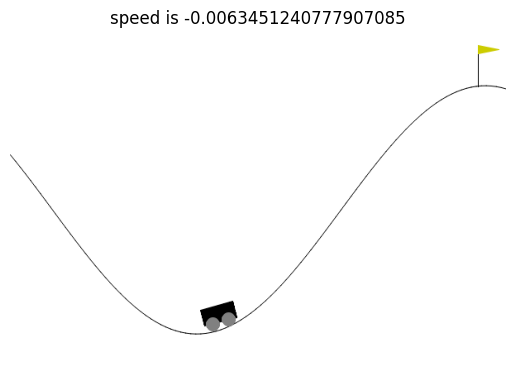

Step 11:
Action taken: 0
New State: [-0.44324264 -0.00800006]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 12:
Action taken: 2
New State: [-0.45083955 -0.00759691]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 13:
Action taken: 2
New State: [-0.45797783 -0.00713828]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 14:
Action taken: 0
New State: [-0.4666051  -0.00862727]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 15:
Action taken: 0
New State: [-0.47665775 -0.01005264]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}


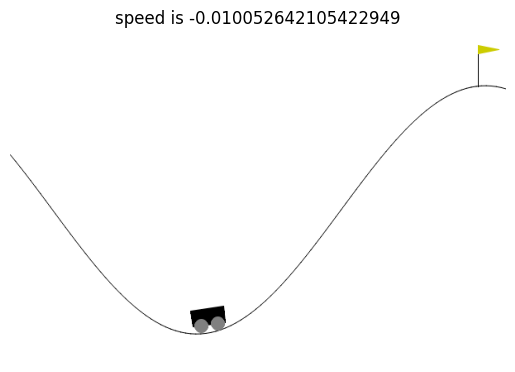

Step 16:
Action taken: 0
New State: [-0.48806128 -0.01140354]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 17:
Action taken: 2
New State: [-0.49873084 -0.01066956]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 18:
Action taken: 2
New State: [-0.50858676 -0.0098559 ]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 19:
Action taken: 0
New State: [-0.5195552  -0.01096845]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}
Step 20:
Action taken: 1
New State: [-0.530554   -0.01099878]
Reward: -1.0
Terminated: False
Truncated: False
Extra Info: {}


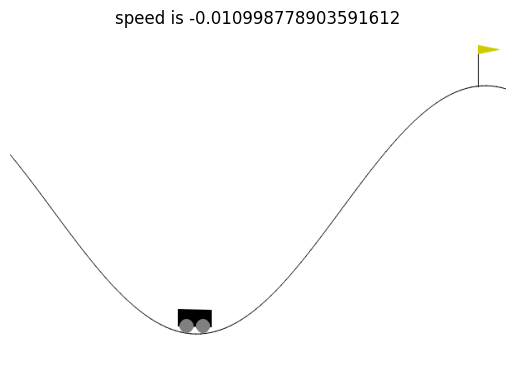

(array([-0.4390563,  0.       ], dtype=float32), {})

In [173]:
env.reset()
print(f"Start state: {env.unwrapped.state}")
num_steps = 20
for i in range(num_steps):
    action = random.choice([0, 1, 2])
    new_state, reward, is_terminate, is_truncated, info = env.step(action)
    print(f"Step {i+1}:")
    print(f"Action taken: {action}")
    print(f"New State: {new_state}")
    print(f"Reward: {reward}")
    print(f"Terminated: {is_terminate}")
    print(f"Truncated: {is_truncated}")
    print(f"Extra Info: {info}")
    if (i+1) % 5 == 0:
        visualize(env)
    if is_terminate or is_truncated:
        print(f"Episode ended after {i+1} steps.")
        env.reset()
        print(f"Environment reset to state: {env.unwrapped.state}")
        break
env.reset()

the state consists of two floats.  first one is position in x axis and second one is speed. in the next cell we will write our agent. First we need to convert continuous state to descrete so complete the relevant functions. after that we need to train our agent using Q_learning formula:


$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

After training we use create policy to save your best actions. Then evaluate your policy.

In [174]:
class MountainCarQL:
    def __init__(self, env, discrete_size=20):
        self.env = env
        self.discrete_size = discrete_size
        self.q_values = self.create_q_values_list()
        self.policy = {}
        self.total_score = 0
        self.end_state = False

    def create_q_values_list(self):
        discrete_os_size = [self.discrete_size] * len(self.env.observation_space.high)
        q_table = np.zeros(discrete_os_size + [self.env.action_space.n])
        return q_table

    def get_discrete_state(self, state):
        discrete_os_size = [self.discrete_size] * len(self.env.observation_space.high)
        interval = self.env.observation_space.high - self.env.observation_space.low
        discrete_os_win_size = interval / discrete_os_size
        discrete_state = (state - self.env.observation_space.low) / discrete_os_win_size
        return tuple(discrete_state.astype(np.int32))

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for episode in range(num_episodes):
            discrete_state = self.get_discrete_state(self.env.reset()[0])
            done = False
            while not done:
                if random.uniform(0, 1) < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.q_values[discrete_state])
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                new_discrete_state = self.get_discrete_state(new_state)

                if not done:
                    max_future_q = np.max(self.q_values[new_discrete_state])
                    current_q = self.q_values[discrete_state + (action,)]
                    new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)
                    self.q_values[discrete_state + (action,)] = new_q
                elif new_state[0] >= self.env.unwrapped.goal_position:
                    print(f"You reached the goal in episode: {episode}")
                    self.q_values[discrete_state + (action,)] = 0

                discrete_state = new_discrete_state

    def create_policy(self):
        all_indexes = np.indices(self.q_values.shape[0:-1]).reshape(len(self.q_values.shape) - 1, -1).T
        for state in all_indexes:
            best_action = np.argmax(self.q_values[tuple(state)])
            self.policy[tuple(state)] = best_action

    def act(self):
        action = self.policy[self.get_discrete_state(self.env.unwrapped.state)]
        next_state, reward, terminated, truncated, _ = self.env.step(action)
        self.end_state = terminated or truncated
        self.total_score += reward

    def evaluate(self, num_episodes):
        total_reward = 0
        wins = 0
        for _ in range(num_episodes):
            self.env.reset()
            self.total_score = 0
            self.end_state = False

            while not self.end_state:
                self.act()
            if self.total_score != -200:
                wins += 1
            total_reward += self.total_score
            
        average_reward = total_reward / num_episodes
        win_percentage = 100 * wins / num_episodes
        return average_reward, win_percentage

train your agent with good parameters

In [175]:
EPISODES = 10000
LEARNING_RATE = 0.2
DISCOUNT = 0.95
EPSILON = 0.20

mountain_car_ql = MountainCarQL(env,discrete_size=30)
mountain_car_ql.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

You reached the goal in episode: 580
You reached the goal in episode: 691
You reached the goal in episode: 930
You reached the goal in episode: 954
You reached the goal in episode: 964
You reached the goal in episode: 977
You reached the goal in episode: 985
You reached the goal in episode: 998
You reached the goal in episode: 1005
You reached the goal in episode: 1105
You reached the goal in episode: 1106
You reached the goal in episode: 1175
You reached the goal in episode: 1184
You reached the goal in episode: 1245
You reached the goal in episode: 1280
You reached the goal in episode: 1288
You reached the goal in episode: 1298
You reached the goal in episode: 1315
You reached the goal in episode: 1316
You reached the goal in episode: 1332
You reached the goal in episode: 1333
You reached the goal in episode: 1334
You reached the goal in episode: 1339
You reached the goal in episode: 1340
You reached the goal in episode: 1345
You reached the goal in episode: 1346
You reached the goal

evaluate your agent with at least 200 episodes. your average score must be more than -170.

In [176]:
mountain_car_ql.create_policy()
print(mountain_car_ql.evaluate(300))

(-138.04333333333332, 98.0)


show the path your car took for only one episode. Use visualize function every 10 frame.

Step: 0


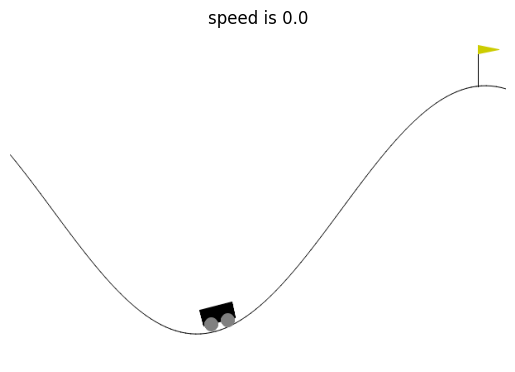

Step: 10


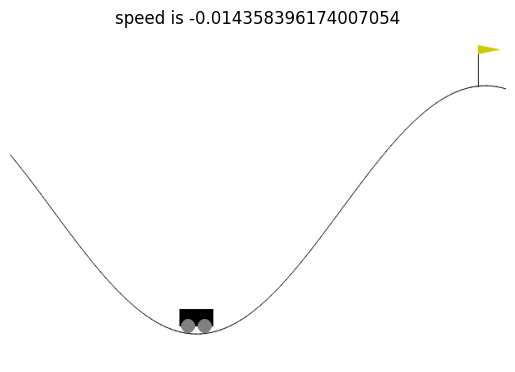

Step: 20


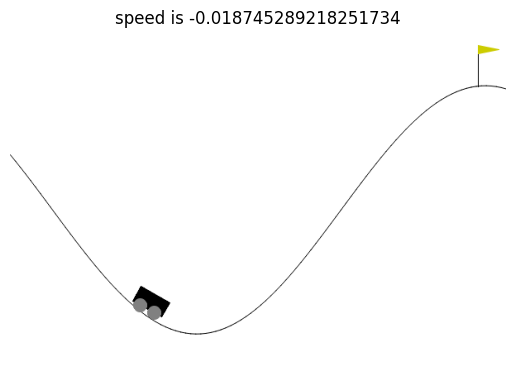

Step: 30


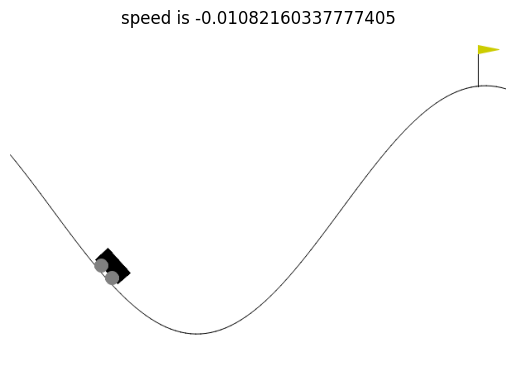

Step: 40


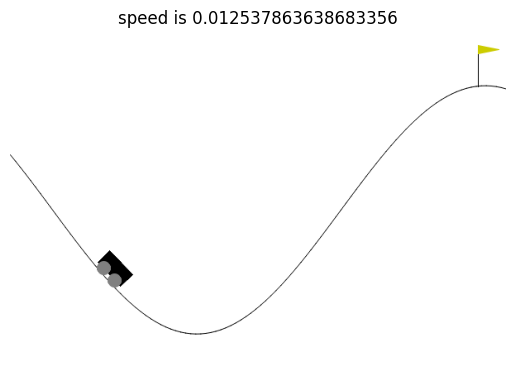

Step: 50


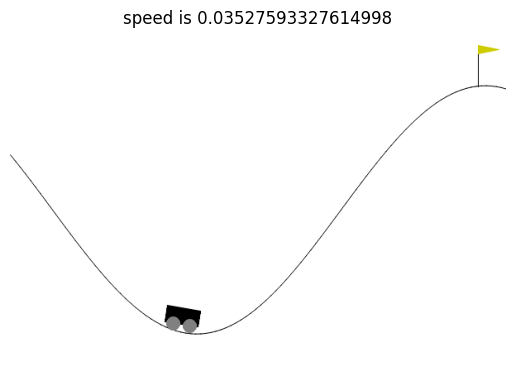

Step: 60


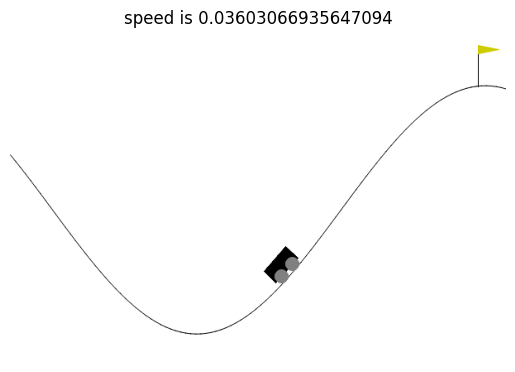

Step: 70


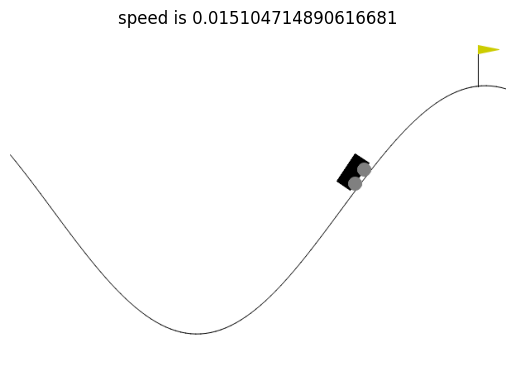

Step: 80


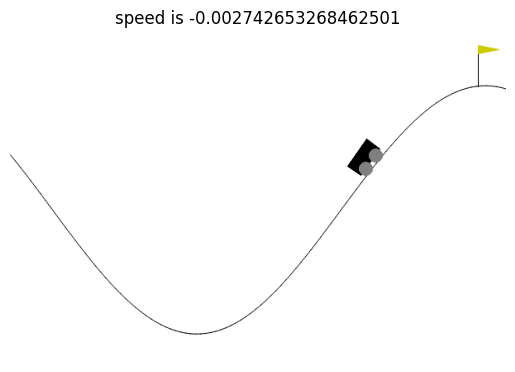

Step: 90


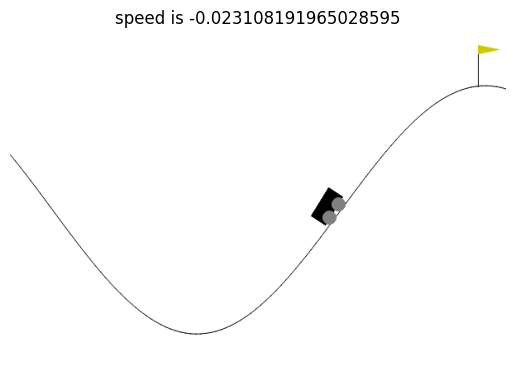

Step: 100


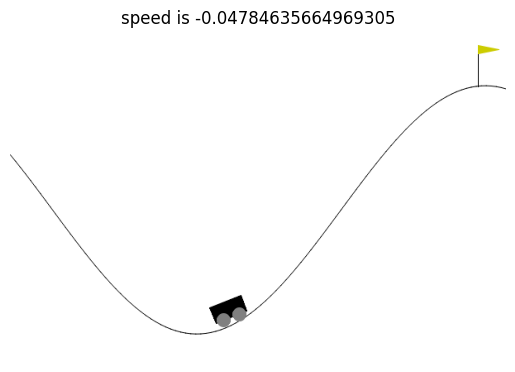

Step: 110


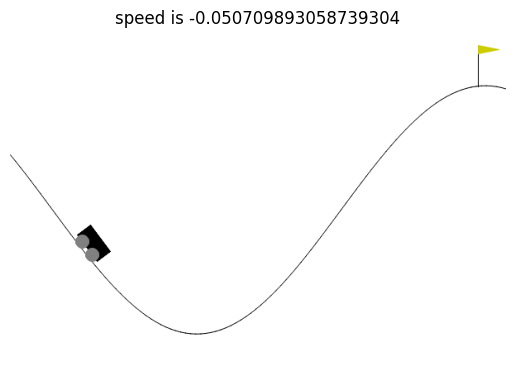

Step: 120


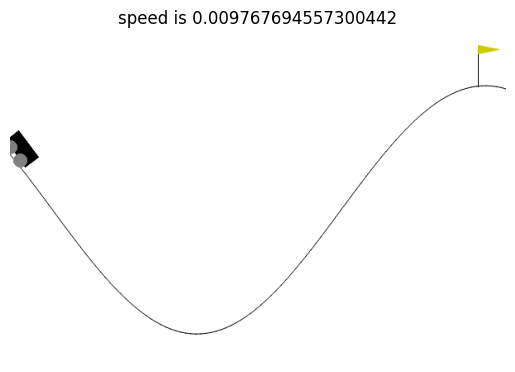

Step: 130


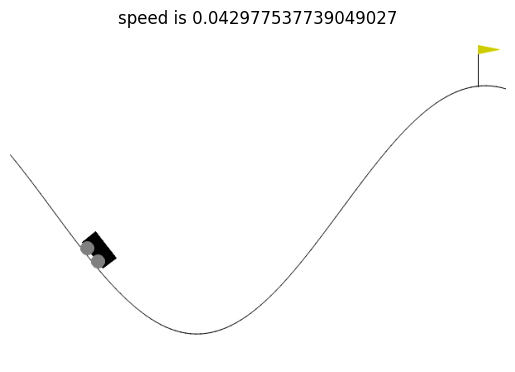

Step: 140


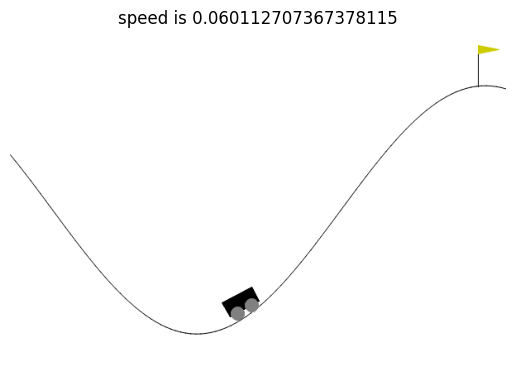

Step: 150


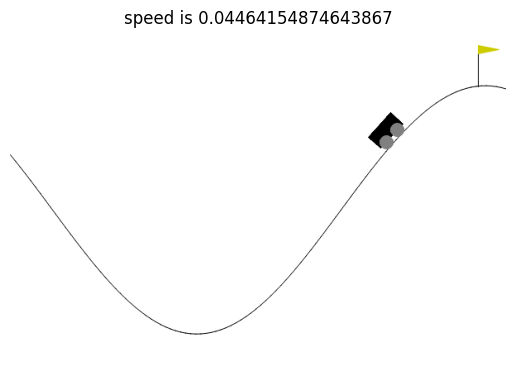

Total Score: -158.0


In [177]:
mountain_car_ql.env.reset()
mountain_car_ql.total_score = 0
mountain_car_ql.end_state = False
index = 0

while not mountain_car_ql.end_state:
    if index % 10 == 0:
        print(f"Step: {index}")
        visualize(mountain_car_ql.env)
    mountain_car_ql.act()
    index += 1

print(f"Total Score: {mountain_car_ql.total_score}")

## SARSA
now we want to use sarsa algorithm here instead of Q learning. The update rule is:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$

In [178]:
class MountainCarSarsa(MountainCarQL):

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            discrete_state = self.get_discrete_state(state)
            done = False
            action = np.argmax(self.q_values[discrete_state]) if random.random() >= epsilon else self.env.action_space.sample()
            index = 0

            while not done:
                new_state, reward, terminated, truncated, _ = self.env.step(action)
                done = terminated or truncated
                new_discrete_state = self.get_discrete_state(new_state)

                new_action = np.argmax(self.q_values[new_discrete_state]) if random.random() >= epsilon else self.env.action_space.sample()

                if not done:
                    future_q = self.q_values[new_discrete_state][new_action]
                    current_q = self.q_values[discrete_state + (action,)]
                    new_q = current_q + alpha * (reward + gamma * future_q - current_q)
                    self.q_values[discrete_state + (action,)] = new_q
                elif new_state[0] >= self.env.unwrapped.goal_position:
                    print(f"Congratulations! We reached the goal! Episode: {episode}, index: {index}")
                    self.q_values[discrete_state + (action,)] = 0

                discrete_state = new_discrete_state
                action = new_action
                index += 1

train your agent with good parameters

In [179]:
EPISODES = 10000
LEARNING_RATE = 0.3
DISCOUNT = 0.95
EPSILON = 0.30

mountain_car_sarsa = MountainCarSarsa(env,discrete_size=30)
mountain_car_sarsa.learn(EPISODES, LEARNING_RATE, DISCOUNT, EPSILON)

Congratulations! We reached the goal! Episode: 719, index: 170
Congratulations! We reached the goal! Episode: 723, index: 164
Congratulations! We reached the goal! Episode: 735, index: 171
Congratulations! We reached the goal! Episode: 817, index: 155
Congratulations! We reached the goal! Episode: 856, index: 199
Congratulations! We reached the goal! Episode: 863, index: 194
Congratulations! We reached the goal! Episode: 871, index: 172
Congratulations! We reached the goal! Episode: 880, index: 162
Congratulations! We reached the goal! Episode: 893, index: 167
Congratulations! We reached the goal! Episode: 958, index: 180
Congratulations! We reached the goal! Episode: 1022, index: 162
Congratulations! We reached the goal! Episode: 1053, index: 165
Congratulations! We reached the goal! Episode: 1096, index: 197
Congratulations! We reached the goal! Episode: 1146, index: 184
Congratulations! We reached the goal! Episode: 1150, index: 167
Congratulations! We reached the goal! Episode: 118

evaluate your agent with at list 200 episodes. your average score must be more than -175.

In [180]:
mountain_car_sarsa.create_policy()
print(mountain_car_sarsa.evaluate(300))

(-168.62, 99.66666666666667)


show the path your car took for only one episode. Use visualize function every 10 frame.

Step: 0


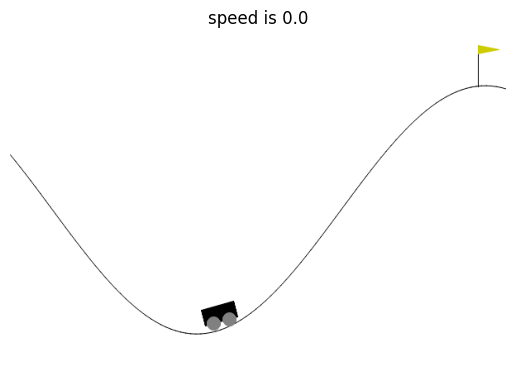

Step: 10


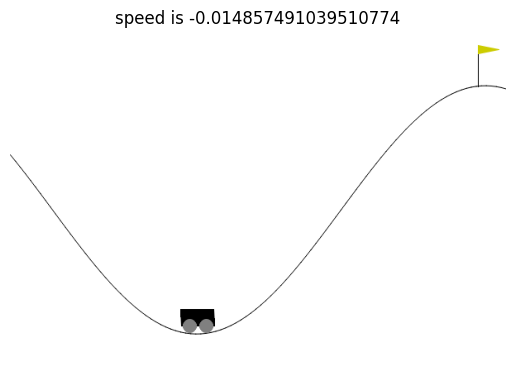

Step: 20


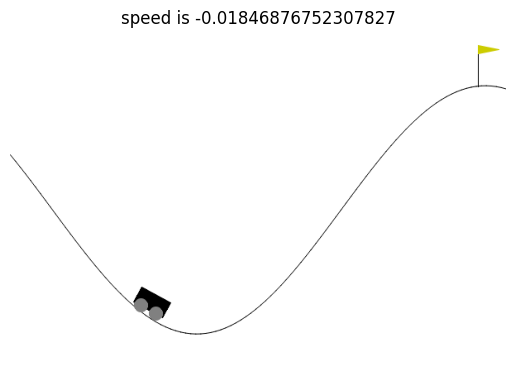

Step: 30


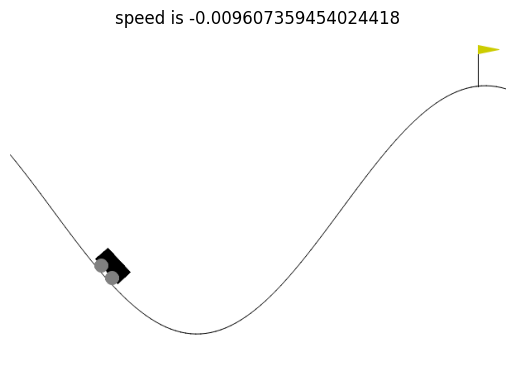

Step: 40


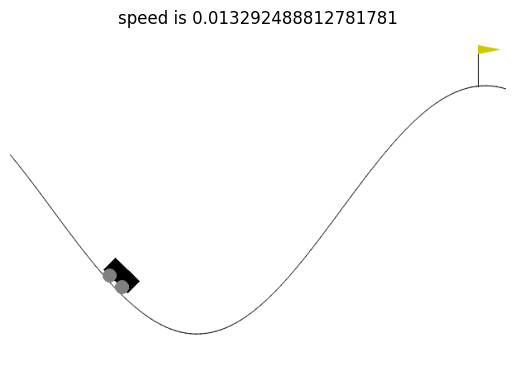

Step: 50


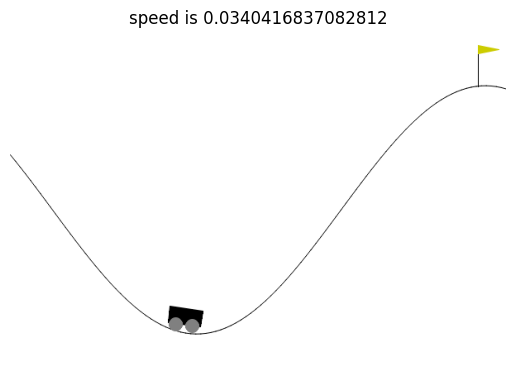

Step: 60


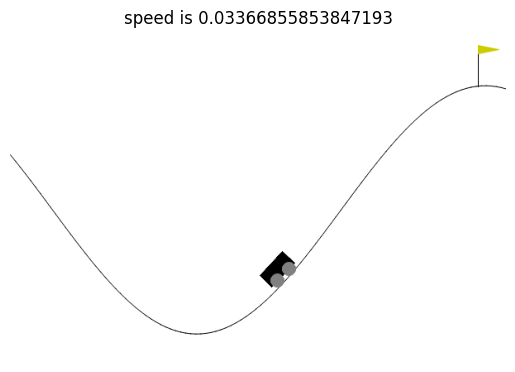

Step: 70


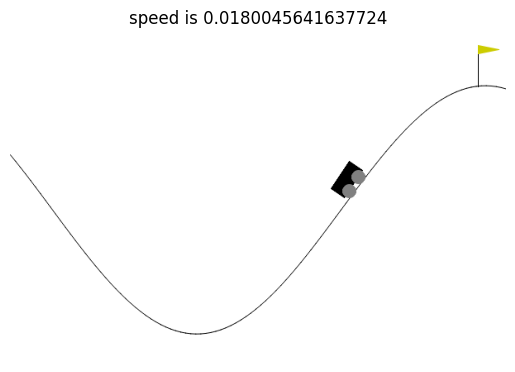

Step: 80


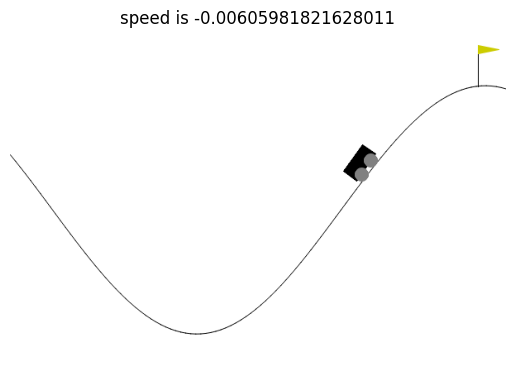

Step: 90


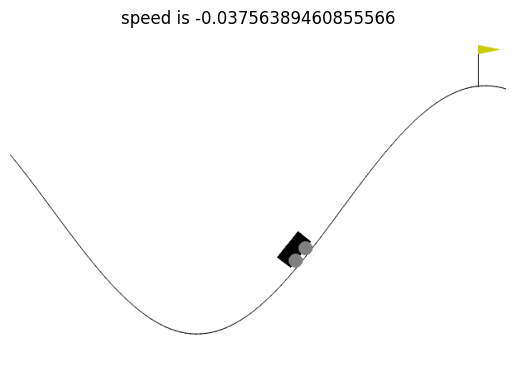

Step: 100


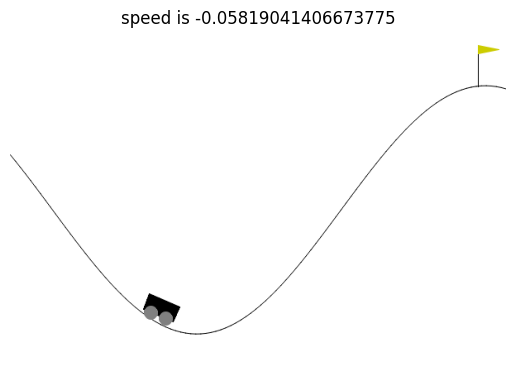

Step: 110


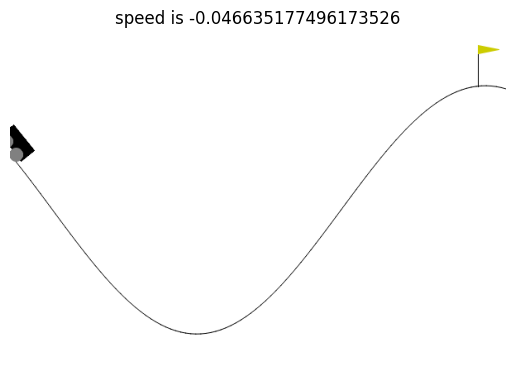

Step: 120


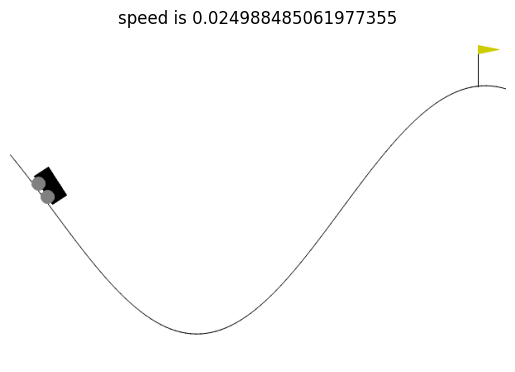

Step: 130


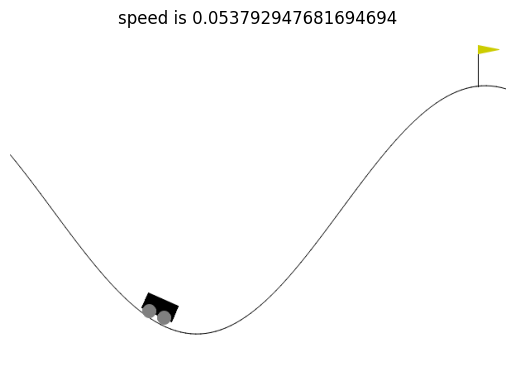

Step: 140


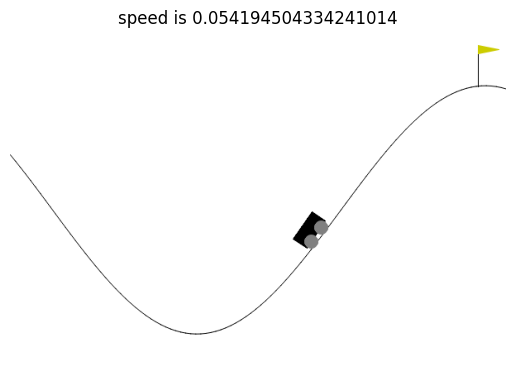

Step: 150


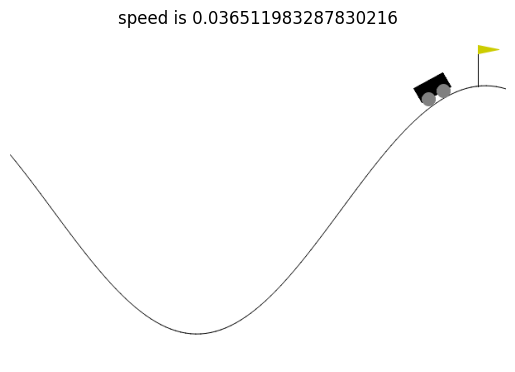

Total Score: -155.0


In [181]:
mountain_car_sarsa.env.reset()
mountain_car_sarsa.total_score = 0
mountain_car_sarsa.end_state = False
index = 0

while not mountain_car_sarsa.end_state:
    if index % 10 == 0:
        print(f"Step: {index}")
        visualize(mountain_car_sarsa.env)
    mountain_car_sarsa.act()
    index += 1

print(f"Total Score: {mountain_car_sarsa.total_score}")

Is there any difference between the two algorithms? Compare results and explain why.

Answer: SARSA shows a higher goal achievement rate, indicating better cautious decision-making with consideration of action noise. Q-learning achieves a higher average reward, suggesting a more aggressive approach optimized for maximum expected future rewards without accounting for variability in action selection. The choice between SARSA and Q-learning depends on balancing risk-taking for potentially higher rewards versus stability in achieving goals under uncertainty.

